# Introduction

From the file import_tweets_hashtag.py I imported 34339 tweets that contains any of these words Russia, Ukraine, or #UkraineRussiaWar.

### Import necessary libraries 

In [1]:
import pandas as pd
import numpy  as np
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.util import bigrams, trigrams, ngrams

### Transfer the Imported Data to a Dataframe
After importing the tweets using the Twitter API in the import_tweets_hashtag.py file, we will read it using a dataframe, and check the shape and the missing data on the raw data

In [2]:
raw_df = pd.read_csv('./data/raw_data.csv')
#raw_df.sample(10)
raw_df.shape

(16000, 17)

<AxesSubplot:>

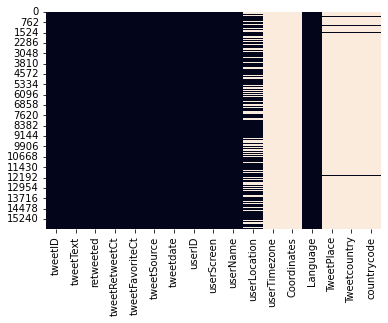

In [3]:
sns.heatmap(raw_df.isnull(), cbar=False)

#### Choose the feature 

## Data Dictionary 

| Syntax                | Description |
| -----------           | ----------- |
|- tweetID :            | The unique identifier for Tweet. The dataset contain 34339 uniq tweets | 
|- tweetText :          | The actual text of the tweet |
|- tweetRetweetCt :     | Number of times this Tweet has been retweeted|
|- tweetFavoriteCt:     | Indicates approximately how many times this Tweet has been liked by Twitter users |
|- tweetCreated:        | UTC time when this Tweet was created  |
|- userID:              | The user ID who posted this Tweet |
|- userName:            | The user Name who posted this Tweet |
|- userLocation:        | The location of the user  |
|- Tweetcountry:        | The location of the user  |

In [4]:
tweet_df = raw_df[['tweetID','tweetText','retweeted', 'tweetRetweetCt','tweetFavoriteCt','tweetdate','userID','userName','userLocation','TweetPlace','Tweetcountry','countrycode']]
tweet_df.shape

(16000, 12)

#### Change the tweetdate to datetime format  

In [6]:
#tweet_df['tweetdate'] = pd.to_datetime(tweet_df['tweetdate'])
#tweet_df['date'] = tweet_df['tweetdate'].dt.date
tweet_df.date.value_counts()

2022-02-28    16000
Name: date, dtype: int64

#### Fill the missing of user location with tweet country

The process of obtaining country code is depend on the userlocation colume. it goes through long process 
I used the country_code.csv to create a dictionary 

In [7]:
import csv
with open('./data/country_code.csv', mode='r') as inp:
    reader = csv.reader(inp)
    code_dic = {rows[0]:rows[1] for rows in reader}

code_dic['Not Defined'] = 'XX'
#print(code_dic)

In [190]:
print(code_dic.get('Not Defined'))

XX


In [23]:
tweet_df['userLocation'].nunique

<bound method IndexOpsMixin.nunique of 0                           NaN
1                           🕳️🐇
2                           NaN
3        Dublin, Ireland. Sigh.
4                           NaN
                  ...          
15995                    kansas
15996                 The World
15997                       NaN
15998                       NaN
15999                Not the US
Name: userLocation, Length: 16000, dtype: object>

In [223]:
tweet_df[tweet_df['countrycode'].isnull() & tweet_df['userLocation'].notnull()]

,tweetID,tweetText,retweeted,tweetRetweetCt,tweetFavoriteCt,tweetdate,userID,userName,userLocation,TweetPlace,Tweetcountry,countrycode,date
1,1498425897954820099,"Hey @GrantRandom, while listening to @SXMOctan...",False,0,0,2022-02-28 22:32:28+00:00,16796735,𝙶𝚊𝚕𝚕𝚊𝚐𝚑𝚎𝚛 🌻,🕳️🐇,NaN,NaN,NaN,2022-02-28
7,1498425896365084675,Why was a purported Russian propaganda website...,False,0,0,2022-02-28 22:32:27+00:00,6203722,Kevin Wardrop,Alba gu bràth,NaN,NaN,NaN,2022-02-28
12,1498425895622692864,@komadovsky hope #Ukraine get them soon. We ar...,False,0,0,2022-02-28 22:32:27+00:00,166097729,Mister Ka,Free Europe,NaN,NaN,NaN,2022-02-28
24,1498425892292366338,@SteveSkojec Boomer tier schizo post. Russia i...,False,0,0,2022-02-28 22:32:26+00:00,829876316,David,Query hell (or purgatory?),NaN,NaN,NaN,2022-02-28
25,1498425892246335489,This might be effective but comes with a huge ...,False,0,0,2022-02-28 22:32:26+00:00,2885563465,Wars on the Brink,World,NaN,NaN,NaN,2022-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15950,1498421967837450243,#UkraineRussiaWar r there American athletes in...,False,0,0,2022-02-28 22:16:51+00:00,1515235069,NeeVA,DMV,NaN,NaN,NaN,2022-02-28
15951,1498421967720005636,"""You do not, in fact, have to choose between A...",False,1,4,2022-02-28 22:16:51+00:00,472127897,Ricardo Segretin 💻🔨,"Buenos Aires, Argentina",NaN,NaN,NaN,2022-02-28
15952,1498421967569002498,tv show\nhttps://t.co/5CSRNHJlvD,False,0,0,2022-02-28 22:16:51+00:00,1159998170459508736,gordie.chowe,Chinadastan,NaN,NaN,NaN,2022-02-28
15988,1498421959415123969,@richsignorelli Did you see he’s “banning” peo...,False,0,0,2022-02-28 22:16:49+00:00,1174023199975063552,"✨T’Shetaar✨🖖🏻It’s the corruption, Stupid!🏴‍☠️",Somewhere out there ✨,NaN,NaN,NaN,2022-02-28


In [8]:
tweet_df.userLocation.value_counts()

United States               219
London, England             119
USA                         108
London                      102
Canada                       91
                           ... 
Fairyland                     1
The Underground Railroad      1
Martock, England              1
winnipeg                      1
Not the US                    1
Name: userLocation, Length: 4691, dtype: int64

In [224]:
country_key = 'Not Defined'
country_Name = 'World'
print(code_dic.get(country_key))

XX


In [225]:
tweet_df[tweet_df['userLocation'].str.contains(country_Name,na=False) & tweet_df['countrycode'].isnull()]

,tweetID,tweetText,retweeted,tweetRetweetCt,tweetFavoriteCt,tweetdate,userID,userName,userLocation,TweetPlace,Tweetcountry,countrycode,date
25,1498425892246335489,This might be effective but comes with a huge ...,False,0,0,2022-02-28 22:32:26+00:00,2885563465,Wars on the Brink,World,NaN,NaN,NaN,2022-02-28
67,1498425883195064320,FIFA's double standards\n#Ukraine #UkraineRuss...,False,0,0,2022-02-28 22:32:24+00:00,1108121022732124167,Oussama,Worldwide,NaN,NaN,NaN,2022-02-28
578,1498425752156614660,Ukraine does not want to be part of the Russia...,False,0,1,2022-02-28 22:31:53+00:00,2582444442,Zoran Elijah Gabriel (house Clermont-Goschütz),World Planet Earth,NaN,NaN,NaN,2022-02-28
1069,1498425627057307649,Miami Beach to Show Solidarity with People of ...,False,0,0,2022-02-28 22:31:23+00:00,17931773,City of Miami Beach,Fun & Sun Capital of the World,NaN,NaN,NaN,2022-02-28
1386,1498425549013897216,.@mattgutmanABC reports from the train station...,False,14,25,2022-02-28 22:31:04+00:00,28785486,ABC News,New York City / Worldwide,NaN,NaN,NaN,2022-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15223,1498422138046492677,"So ashamed to be thought of as British, let al...",False,0,1,2022-02-28 22:17:31+00:00,36016773,Rupert Bumfrey 💙🖤🤎💚,Europe/Arabia/World,NaN,NaN,NaN,2022-02-28
15265,1498422128688996356,@2doesnotequal5 @RealCandaceO To equate events...,False,1,1,2022-02-28 22:17:29+00:00,870427502,Pro-Choice Adoptee with a WHITEBOARD 🦂🖤🇺🇸🇺🇦,"VA,US, the World, the Universe",NaN,NaN,NaN,2022-02-28
15405,1498422098582196229,@YourAnonEmbassy Ukraine needs this https://t....,False,0,0,2022-02-28 22:17:22+00:00,1496069421797888006,NonFungibleDeny,All over the World,NaN,NaN,NaN,2022-02-28
15473,1498422080894910467,Reporting from the #Ukraine border @WCKitchen ...,False,1,0,2022-02-28 22:17:18+00:00,1185542156737564672,Vitascope,WorldWide,NaN,NaN,NaN,2022-02-28


In [219]:
tweet_df['countrycode'] = np.where(tweet_df['userLocation'].str.contains(country_Name,na=False) & tweet_df['countrycode'].isnull(), code_dic.get(country_key), tweet_df['countrycode'])

/tmp/ipykernel_9733/874373601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['countrycode'] = np.where(tweet_df['userLocation'].str.contains(country_Name,na=False) & tweet_df['countrycode'].isnull(), code_dic.get(country_key), tweet_df['countrycode'])


In [222]:
tweet_df.countrycode.isnull().sum()

13213

In [220]:
tweet_df.countrycode.value_counts()

US    1465
CA     492
AU     173
NG     147
DE     114
IE     111
UA      86
GB      46
PT      39
PL      29
JP      18
XX       8
UG       8
IN       8
IT       4
MA       3
EE       3
KR       3
NO       3
ES       2
NL       2
BR       2
FI       2
JM       1
TT       1
LR       1
TR       1
KE       1
ZA       1
GR       1
GE       1
BS       1
RU       1
FR       1
BE       1
ID       1
HR       1
GH       1
DO       1
MX       1
CH       1
NZ       1
Name: countrycode, dtype: int64

In [ ]:
tweet_df['countrycode'] = np.where(country_code['Name'] in tweet_df['userLocation'], country_code['Code'], '')

In [ ]:
len(tweet_df[tweet_df.userLocation.isnull()])

In [ ]:
len(tweet_df[tweet_df.userLocation.isnull() & (tweet_df.Tweetcountry.notnull())])

#### Save Cleaned Data

Save the cleaned data to cleaned_data.csv

In [229]:
# Overwrite or add
ans = input('Do you want overwrite the file? (y/n): ')
if (ans == 'y'):
    tweet_df.to_csv('./data/cleaned_data.csv', index=False)
else:  
    # check if the file exist, it will add the data 
    try:
        with open('./data/cleaned_data.csv') as f:
            print('Add The data to the existing file')
            tweet_df.to_csv('./data/cleaned_data.csv',mode='a', header=False, index=False)
    except IOError:
       print('Create new file')
       tweet_df.to_csv('./data/cleaned_data.csv', index=False)

In [227]:
cleaned_tweet_df = pd.read_csv('./data/cleaned_data.csv')
cleaned_tweet_df.shape

(16000, 13)

In [228]:
cleaned_tweet_df.head()

,tweetID,tweetText,retweeted,tweetRetweetCt,tweetFavoriteCt,tweetdate,userID,userName,userLocation,TweetPlace,Tweetcountry,countrycode,date
0,1498425898089033731,@RealPepeEscobar Flush those fancy degrees dow...,False,0,0,2022-02-28 22:32:28+00:00,3306928708,Isaac La,NaN,NaN,NaN,NaN,2022-02-28
1,1498425897954820099,"Hey @GrantRandom, while listening to @SXMOctan...",False,0,0,2022-02-28 22:32:28+00:00,16796735,𝙶𝚊𝚕𝚕𝚊𝚐𝚑𝚎𝚛 🌻,🕳️🐇,NaN,NaN,NaN,2022-02-28
2,1498425897820606465,Stephen King stands with #Ukraine!\n@StephenKi...,False,0,0,2022-02-28 22:32:28+00:00,377894223,Giuseppe Squeri,NaN,NaN,NaN,NaN,2022-02-28
3,1498425897757687810,@kilogolfsierra @form_whisperer @EdwardGLuce U...,False,0,0,2022-02-28 22:32:28+00:00,2966312224,Mark Keogh,"Dublin, Ireland. Sigh.",NaN,NaN,IE,2022-02-28
4,1498425897682186241,@indiana_imo It's because Russia is a nuclear ...,False,0,0,2022-02-28 22:32:28+00:00,1453830849972117504,klebanon,NaN,NaN,NaN,NaN,2022-02-28


#### Delete the duplicate tweets

In [ ]:
tweet_df.tweetText.value_counts()

In [ ]:
tweet_df['duplicattweet'] = tweet_df.duplicated(subset=['tweetText'], keep='first')

In [ ]:
tweet_df.duplicattweet.value_counts()

In [ ]:
tweet_df.drop(tweet_df[tweet_df.duplicattweet == True].index, inplace=True)
tweet_df.duplicattweet.value_counts()

---------------------------------------------------------------------------------------------------

# Under Development  

In [ ]:
len(tweet_df[tweet_df.userLocation.isnull() & (tweet_df.countrycode.notnull())]) 

In [ ]:
tweet_df[(tweet_df.userLocation.isnull() & (tweet_df.countrycode.notnull()))]

In [ ]:
tweet_df.info()

In [ ]:
sns.set_theme(style="ticks")
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(
    tweet_df,
    x="TweetPlace",hue="TweetPlace", 
    multiple="stack",
    ax=ax,
)
plt.xticks(rotation=45)
plt.show()

In [ ]:
raw_df.tweetdate.value_counts()

In [ ]:
tweet_df.sample(100)

In [ ]:
tweet_df.userLocation.value_counts()

In [ ]:
tweet_df.retweeted.value_counts()

In [ ]:
tweet_df.tweetText.value_counts()

In [ ]:
tweet_df.date.value_counts()

In [ ]:
tweet_df.tweetID.value_counts()